In [2]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging Libraries
import logging
logging.basicConfig(level= logging.INFO,
                    filemode = 'w',
                    filename = 'model.log',
                    format = '%(asctime)s - %(levelname)s - %(message)s')

# Import Scikit Learn Libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
#Importing Metrics for Regression Model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Import Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [3]:
# Import Dataset 
df = pd.read_csv('Life Expectancy Data.csv')
df.sample(frac = 1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
69,Antigua and Barbuda,2010,Developing,75.6,138.0,0,7.84,1983.956937,98.0,0,...,99.0,5.63,98.0,0.1,12126.876140,NaN,3.3,3.3,0.783,14.1
340,Botswana,2011,Developing,62.2,325.0,2,5.76,668.956285,95.0,8,...,96.0,5.25,95.0,5.5,7645.214690,251339.0,7.7,7.4,0.678,12.4
2661,Trinidad and Tobago,2003,Developing,69.3,191.0,0,5.53,78.722161,76.0,0,...,91.0,5.13,91.0,0.5,884.518666,128452.0,6.4,6.9,0.729,12.0
1825,Nepal,2003,Developing,64.3,22.0,38,0.20,2.790965,2.0,13344,...,76.0,5.48,78.0,0.1,253.724120,2495623.0,18.0,18.6,0.457,9.2
1207,Indonesia,2010,Developing,68.1,187.0,138,0.08,190.545365,83.0,18869,...,82.0,2.74,81.0,0.3,3113.486350,242524123.0,1.6,1.5,0.656,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,Vanuatu,2014,Developing,71.7,134.0,0,0.01,564.816704,64.0,10,...,65.0,5.20,64.0,0.1,3148.365130,25885.0,1.5,1.4,0.596,10.8
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
478,Cambodia,2001,Developing,58.5,273.0,25,1.71,27.689711,NaN,3761,...,59.0,5.70,6.0,2.2,321.226340,1242473.0,11.6,11.8,0.412,7.6
788,Ecuador,2013,Developing,76.0,121.0,6,3.77,59.128502,87.0,0,...,87.0,7.29,87.0,0.1,674.982900,15661547.0,1.3,1.1,0.725,13.4


In [4]:
# Checking Data Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

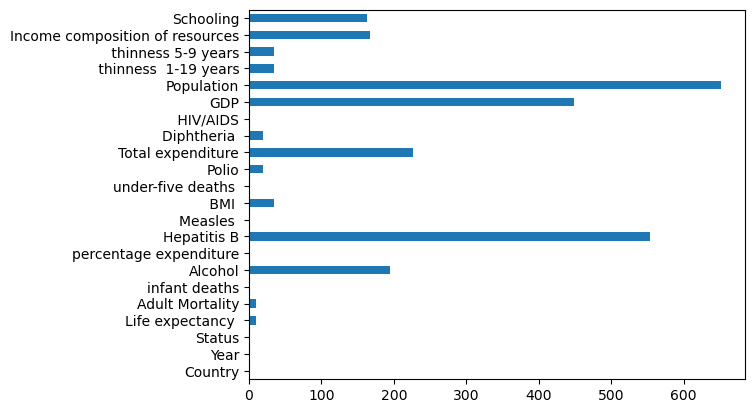

In [5]:
# Checking Null Values stats using Graphical Method
df.isnull().sum().plot(kind = 'barh')
plt.show()

In [6]:
# Checking columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
# Segregate the Categorical and Numerical Columns
numerical_col = df.select_dtypes(exclude = 'object')
categorical_col = df.select_dtypes(include = 'object')

In [9]:
numerical_col

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [10]:
categorical_col

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [11]:
from sklearn.impute import SimpleImputer
for i in numerical_col.columns:
    sc = SimpleImputer(strategy='median')
    df[i] = sc.fit_transform(df[[i]])

In [12]:
from sklearn.impute import SimpleImputer
for i in categorical_col.columns:
    sc = SimpleImputer(strategy='most_frequent')
    df[i]=sc.fit_transform(df[[i]]).ravel()

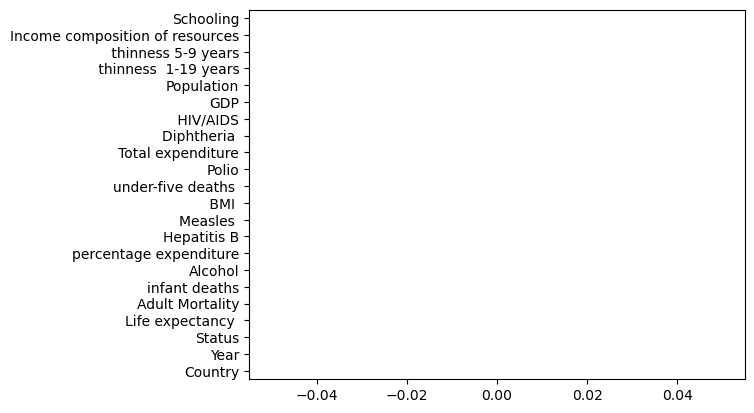

In [13]:
df.isnull().sum().plot(kind = 'barh')
plt.show()

In [14]:
# Checking Descriptive Statistics
# Univariate Analysis
from collections import OrderedDict
stats =[]
for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count':df[i].count(),
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Mode':df[i].mode()[0],
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'Min':df[i].min(),
        'Max':df[i].max(),
        'Var':df[i].var(),
        'Std':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt()
        })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feature,Count,Mean,Median,Mode,Q1,Q3,IQR,Min,Max,Var,Std,Skewness,Kurtosis
0,Year,2938,2.007519e+03,2.008000e+03,2.013000e+03,2004.000000,2.012000e+03,8.000000e+00,2000.00000,2.015000e+03,2.128753e+01,4.613841e+00,-0.006409,-1.213722
1,Life expectancy,2938,6.923472e+01,7.210000e+01,7.300000e+01,63.200000,7.560000e+01,1.240000e+01,36.30000,8.900000e+01,9.042327e+01,9.509115e+00,-0.642391,-0.224081
2,Adult Mortality,2938,1.647257e+02,1.440000e+02,1.200000e+01,74.000000,2.270000e+02,1.530000e+02,1.00000,7.230000e+02,1.539739e+04,1.240862e+02,1.177899,1.766855
3,infant deaths,2938,3.030395e+01,3.000000e+00,0.000000e+00,0.000000,2.200000e+01,2.200000e+01,0.00000,1.800000e+03,1.390666e+04,1.179265e+02,9.786963,116.042756
4,Alcohol,2938,4.546875e+00,3.755000e+00,1.000000e-02,1.092500,7.390000e+00,6.297500e+00,0.01000,1.787000e+01,1.538166e+01,3.921946e+00,0.649578,-0.624913
5,percentage expenditure,2938,7.382513e+02,6.491291e+01,0.000000e+00,4.685343,4.415341e+02,4.368488e+02,0.00000,1.947991e+04,3.951805e+06,1.987915e+03,4.652051,26.573387
6,Hepatitis B,2938,8.302212e+01,9.200000e+01,9.200000e+01,82.000000,9.600000e+01,1.400000e+01,1.00000,9.900000e+01,5.288613e+02,2.299698e+01,-2.281697,4.401205
7,Measles,2938,2.419592e+03,1.700000e+01,0.000000e+00,0.000000,3.602500e+02,3.602500e+02,0.00000,2.121830e+05,1.314983e+08,1.146727e+04,9.441332,114.859903
8,BMI,2938,3.838118e+01,4.350000e+01,4.350000e+01,19.400000,5.610000e+01,3.670000e+01,1.00000,8.730000e+01,3.974192e+02,1.993537e+01,-0.229157,-1.270966
9,under-five deaths,2938,4.203574e+01,4.000000e+00,0.000000e+00,0.000000,2.800000e+01,2.800000e+01,0.00000,2.500000e+03,2.574277e+04,1.604455e+02,9.495065,109.752795


In [15]:
df['Life expectancy '].value_counts()

Life expectancy 
73.0    45
75.0    33
78.0    31
73.6    28
76.0    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: count, Length: 362, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_col.columns:
  df[i] = le.fit_transform(df[i])

In [17]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,1,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014.0,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013.0,1,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012.0,1,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011.0,1,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004.0,1,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003.0,1,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002.0,1,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001.0,1,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [18]:
#Preventing Data Leakage

# Step 01: Split the dataset in X and y
X = df.drop(columns=['Country','Population', 'Life expectancy '], axis=1)
y = df['Life expectancy ']

# Step 02: Using Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# Step 03: Using Scaling Technique
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

r2_score(y_test,y_pred_RF)

0.9618496390173766

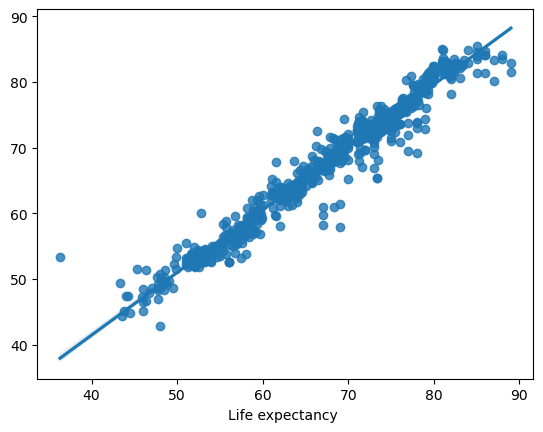

In [20]:
# Model Performance
sns.regplot(x = y_test, y = y_pred_RF)
plt.show()

In [21]:
# XGBoost algorithm
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

r2_score(y_test,y_pred_xgb)

0.9613593484873214

In [24]:
!pip install catboost

In [25]:
# CatBoost Algorithm
from catboost import CatBoostRegressor
cat = CatBoostRegressor().fit(X_train,y_train)
y_pred_cat = cat.predict(X_test)

r2_score(y_test,y_pred_cat)

Learning rate set to 0.045881
0:	learn: 9.0966697	total: 93.2ms	remaining: 1m 33s
1:	learn: 8.7845045	total: 99.9ms	remaining: 49.8s
2:	learn: 8.4859304	total: 106ms	remaining: 35.4s
3:	learn: 8.1967839	total: 113ms	remaining: 28.1s
4:	learn: 7.9325992	total: 118ms	remaining: 23.5s
5:	learn: 7.6826531	total: 124ms	remaining: 20.5s
6:	learn: 7.4287513	total: 129ms	remaining: 18.3s
7:	learn: 7.1888248	total: 134ms	remaining: 16.6s
8:	learn: 6.9667155	total: 139ms	remaining: 15.3s
9:	learn: 6.7515607	total: 144ms	remaining: 14.2s
10:	learn: 6.5494584	total: 148ms	remaining: 13.3s
11:	learn: 6.3656098	total: 153ms	remaining: 12.6s
12:	learn: 6.1715206	total: 158ms	remaining: 12s
13:	learn: 5.9918498	total: 163ms	remaining: 11.4s
14:	learn: 5.8269043	total: 168ms	remaining: 11.1s
15:	learn: 5.6675348	total: 172ms	remaining: 10.6s
16:	learn: 5.5117017	total: 177ms	remaining: 10.2s
17:	learn: 5.3636642	total: 182ms	remaining: 9.92s
18:	learn: 5.2240001	total: 188ms	remaining: 9.71s
19:	learn:

0.9663605544789556

In [26]:
# HuberRegressor
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor().fit(X_train,y_train)
y_pred_huber = huber.predict(X_test)

r2_score(y_test,y_pred_huber)

0.8031294867877076

In [30]:
RF.feature_importances_

array([7.84748103e-03, 2.05798041e-04, 1.15135658e-01, 5.75193855e-03,
       9.38793018e-03, 3.44809463e-03, 1.68800254e-03, 4.19080021e-03,
       3.21650555e-02, 1.08566423e-02, 3.50373616e-03, 5.72838505e-03,
       3.27931225e-03, 5.86236822e-01, 4.77937602e-03, 5.69782085e-03,
       1.03718877e-02, 1.78388127e-01, 1.13371313e-02])

In [31]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [32]:
df = df[['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]

In [33]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,1,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014.0,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013.0,1,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012.0,1,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011.0,1,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004.0,1,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003.0,1,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002.0,1,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001.0,1,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


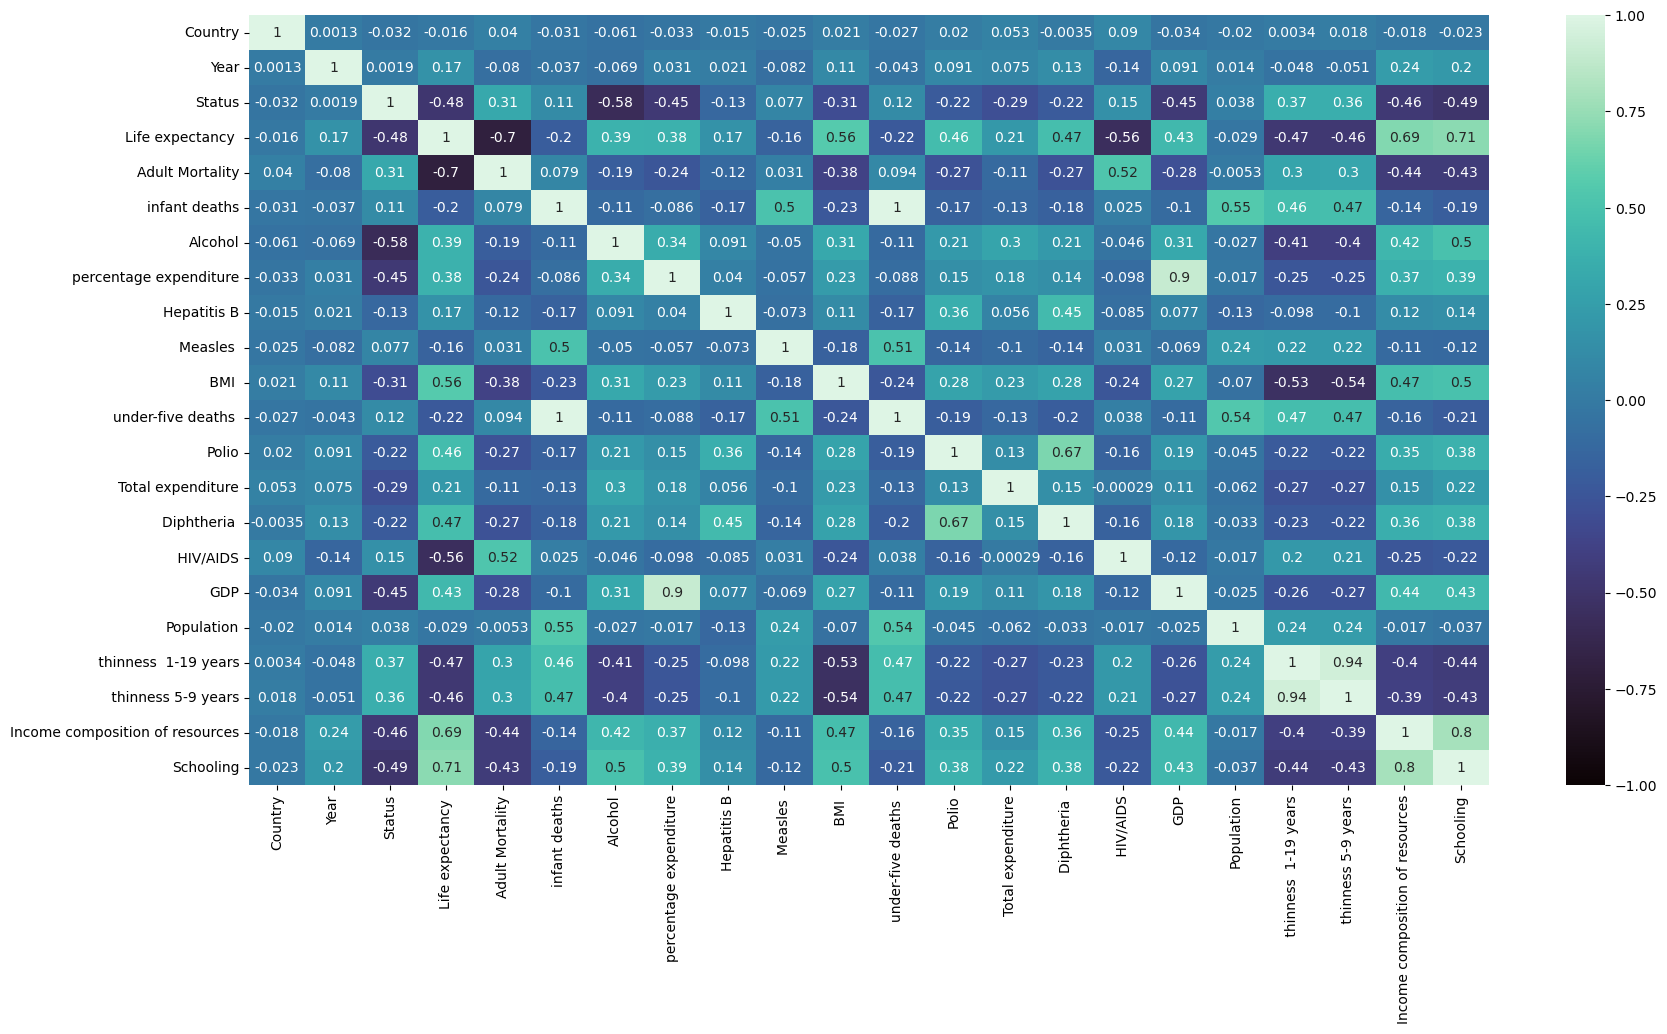

In [34]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True , vmax = 1 ,vmin = -1 , cmap = 'mako')
plt.show()